# 6-1. 프로젝트 인물 모드 문제점 찾기

## Step 1. 인물모드 직접 해 보기

In [3]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


(2944, 2208, 3)


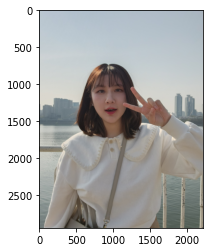

In [14]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_selfie2.jpg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7d958679a580>)

In [17]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [18]:
segvalues, output = model.segmentAsPascalvoc(img_path)

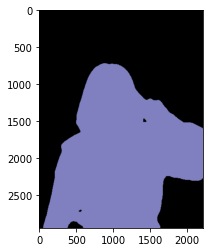

In [19]:
plt.imshow(output)
plt.show()

In [20]:
segvalues

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [22]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [24]:
colormap[15]

array([192, 128, 128])

colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어 색상순서 변경

In [25]:
seg_color = (128,128,192)

(2944, 2208)


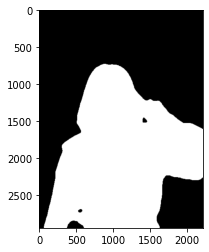

In [26]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

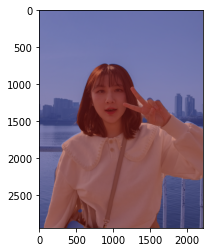

In [27]:
img_show = img_orig.copy()
img_mask = seg_map.astype(np.uint8) * 255
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)


img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

배경 흐리게 하기

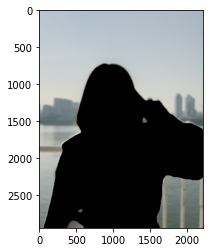

In [34]:
img_orig_blur = cv2.blur(img_orig, (31,31))
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

배경과 원본 합성

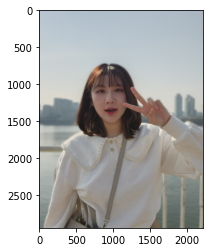

In [37]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

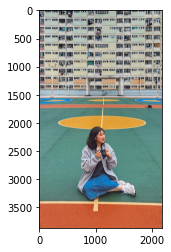

In [40]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_selfie3.jpg'  
img_orig = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [41]:
segvalues, output = model.segmentAsPascalvoc(img_path)

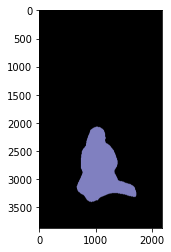

In [42]:
plt.imshow(output)
plt.show()

(3867, 2177)


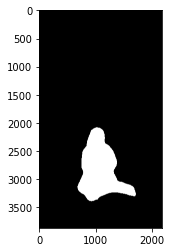

In [46]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

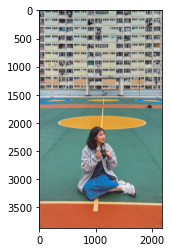

In [51]:
img_orig_blur = cv2.blur(img_orig, (13,13))
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)

In [53]:
print("img_orig_blur shape:", img_orig_blur.shape, "dtype:", img_orig_blur.dtype)
print("img_bg_mask shape:", img_bg_mask.shape, "dtype:", img_bg_mask.dtype)

img_orig_blur shape: (3867, 2177, 3) dtype: uint8
img_bg_mask shape: (2944, 2208, 3) dtype: uint8


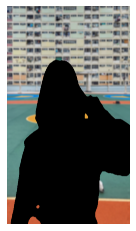

In [55]:
# Blur 처리된 원본 이미지
img_orig_blur = cv2.blur(img_orig, (31, 31))

# 마스크를 컬러(BGR)로 변환
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# 마스크 반전
img_bg_mask = cv2.bitwise_not(img_mask_color)

# 크기 맞추기: img_bg_mask를 img_orig_blur 크기로 조정
img_bg_mask_resized = cv2.resize(img_bg_mask, (img_orig_blur.shape[1], img_orig_blur.shape[0]))

# 데이터 유형 맞추기
img_bg_mask_resized = img_bg_mask_resized.astype(img_orig_blur.dtype)

# 배경 블러 처리
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask_resized)

# 결과 시각화
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [56]:
# 처리할 이미지 경로 리스트
img_paths = [
    os.getenv('HOME')+'/aiffel/human_segmentation/images/my_selfie2.jpg',
    os.getenv('HOME')+'/aiffel/human_segmentation/images/my_selfie3.jpg',  
    os.getenv('HOME')+'/aiffel/human_segmentation/images/my_selfie4.jpg'
]

Processing: /aiffel/aiffel/human_segmentation/images/my_selfie2.jpg
Original image shape: (2944, 2208, 3)


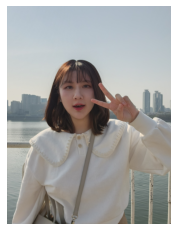

Segmentation map shape: (2944, 2208)


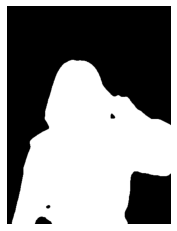

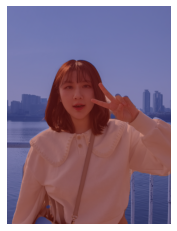

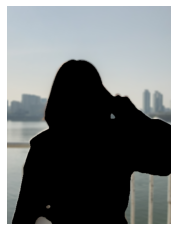

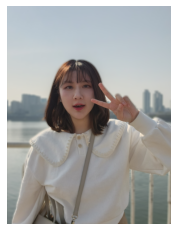

Processing: /aiffel/aiffel/human_segmentation/images/my_selfie3.jpg
Original image shape: (3867, 2177, 3)


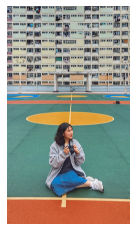

Segmentation map shape: (3867, 2177)


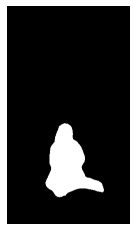

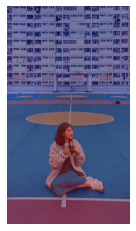

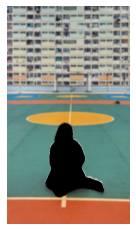

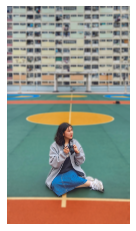

Processing: /aiffel/aiffel/human_segmentation/images/my_selfie4.jpg
Original image shape: (4032, 3024, 3)


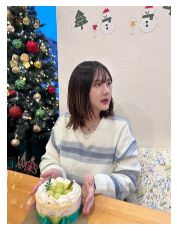

Segmentation map shape: (4032, 3024)


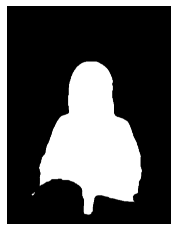

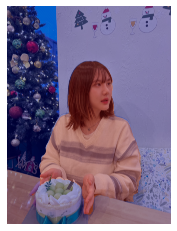

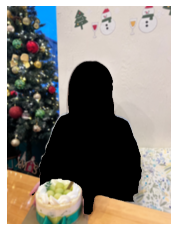

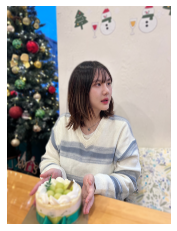

In [61]:
# 모델 로드 (한 번만 로드)
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

# 각 이미지 처리
for img_path in img_paths:
    # 원본 이미지 읽기
    img_orig = cv2.imread(img_path)

    print(f"Processing: {img_path}")
    print("Original image shape:", img_orig.shape)
    plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # 모델 세그멘테이션 수행
    segvalues, output = model.segmentAsPascalvoc(img_path)

    # 세그멘테이션 맵 생성
    seg_color = (128, 128, 192)  # 대상 객체의 색상 값
    seg_map = np.all(output == seg_color, axis=-1)  # 색상이 일치하는 픽셀 추출
    print("Segmentation map shape:", seg_map.shape)
    plt.imshow(seg_map, cmap='gray')
    plt.axis('off')
    plt.show()

    # 마스크 생성 및 시각화
    img_mask = seg_map.astype(np.uint8) * 255
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
    img_show = cv2.addWeighted(img_orig, 0.6, color_mask, 0.4, 0.0)
    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # 블러 처리 및 마스크 결합
    img_orig_blur = cv2.blur(img_orig, (31, 31))  # 배경 블러 처리
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)  # 마스크를 컬러로 변환
    img_bg_mask = cv2.bitwise_not(img_mask_color)  # 마스크 반전
    img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)  # 배경 블러 처리

    plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # 배경과 결합한 최종 이미지
    img_concat = np.where(img_mask_color == 255, img_orig, img_bg_blur)
    plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


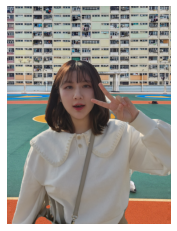

In [10]:
# 모델 로드 (한 번만 로드)
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

# 이미지 경로 리스트 (각각의 이미지 경로)
img_paths = [
    os.getenv('HOME')+'/aiffel/human_segmentation/images/my_selfie2.jpg',  # 배경을 추출할 이미지
    os.getenv('HOME')+'/aiffel/human_segmentation/images/my_selfie3.jpg'   # 배경을 교체할 이미지
]

# `my_selfie2`의 배경을 `my_selfie3`에 교체
img_orig = cv2.imread(img_paths[0])  # my_selfie2
img_new_bg = cv2.imread(img_paths[1])  # my_selfie3

# 원본 이미지 세그멘테이션 수행
segvalues, output = model.segmentAsPascalvoc(img_paths[0])

# 세그멘테이션 맵 생성
seg_color = (128, 128, 192)  # 대상 객체의 색상 값
seg_map = np.all(output == seg_color, axis=-1)  # 색상이 일치하는 픽셀 추출

# 마스크 생성
img_mask = seg_map.astype(np.uint8) * 255
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)  # 마스크를 컬러로 변환
img_bg_mask = cv2.bitwise_not(img_mask_color)  # 마스크 반전

# 배경을 추출한 my_selfie2 이미지를 블러 처리
img_orig_blur = cv2.blur(img_orig, (31, 31))  # 배경 블러 처리

# `my_selfie3`의 배경 크기를 `my_selfie2`의 크기와 맞춤
img_new_bg_resized = cv2.resize(img_new_bg, (img_orig.shape[1], img_orig.shape[0]))

# **배경만 교체 (인물은 `my_selfie2`, 배경은 `my_selfie3`의 배경으로 변경)**
img_concat_new_bg = np.where(img_mask_color == 255, img_orig, img_new_bg_resized)

# 결과 시각화 (배경 교체된 이미지)
plt.imshow(cv2.cvtColor(img_concat_new_bg, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Processing: /aiffel/aiffel/human_segmentation/images/my_selfie2.jpg
Original image shape: (2944, 2208, 3)


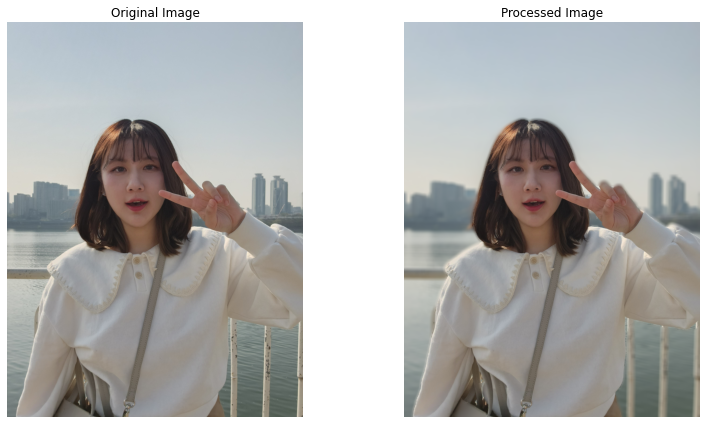

Processing: /aiffel/aiffel/human_segmentation/images/my_selfie3.jpg
Original image shape: (3867, 2177, 3)


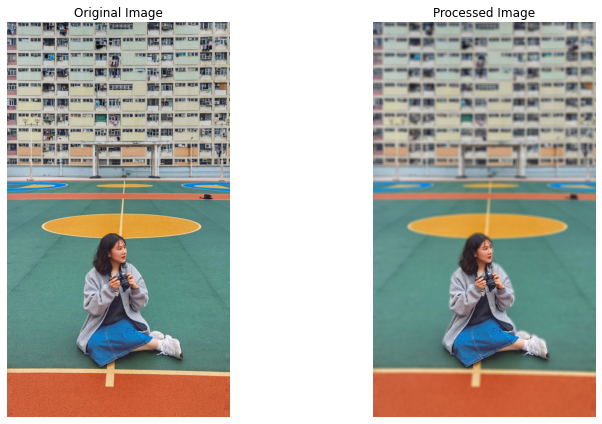

In [11]:
# 모델 로드 (한 번만 로드)
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

# 각 이미지 처리
for img_path in img_paths:
    # 원본 이미지 읽기
    img_orig = cv2.imread(img_path)

    print(f"Processing: {img_path}")
    print("Original image shape:", img_orig.shape)

    # 모델 세그멘테이션 수행
    segvalues, output = model.segmentAsPascalvoc(img_path)

    # 세그멘테이션 맵 생성
    seg_color = (128, 128, 192)  # 대상 객체의 색상 값
    seg_map = np.all(output == seg_color, axis=-1)  # 색상이 일치하는 픽셀 추출

    # 마스크 생성 및 블러 처리
    img_mask = seg_map.astype(np.uint8) * 255
    img_orig_blur = cv2.blur(img_orig, (31, 31))  # 배경 블러 처리
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)  # 마스크를 컬러로 변환
    img_bg_mask = cv2.bitwise_not(img_mask_color)  # 마스크 반전
    img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)  # 배경 블러 처리

    # 배경과 결합한 최종 이미지
    img_concat = np.where(img_mask_color == 255, img_orig, img_bg_blur)

    # 처리 전후 이미지 비교 시각화
    plt.figure(figsize=(12, 6))

    # 처리 전 (원본 이미지)
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    # 처리 후 (결과 이미지)
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    plt.title("Processed Image")
    plt.axis('off')

    # 이미지 보여주기
    plt.tight_layout()
    plt.show()


(1411, 1058, 3)


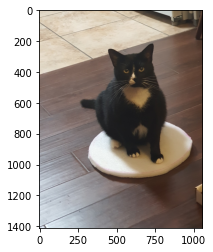

In [4]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_cat.jpg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7871eaf1b130>)

In [7]:
model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file)

In [8]:
segvalues, output = model.segmentAsPascalvoc(img_path)

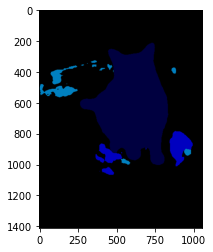

In [9]:
plt.imshow(output)
plt.show()

In [11]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [12]:
colormap[8]

array([64,  0,  0])

In [13]:
seg_color = (0, 0, 64)

(1411, 1058)


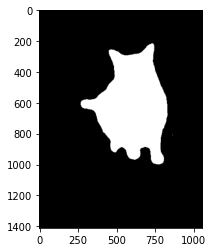

In [14]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

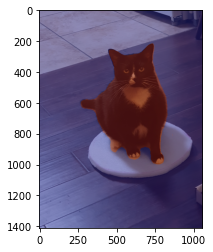

In [18]:
img_show = img_orig.copy()
img_mask = seg_map.astype(np.uint8) * 255
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

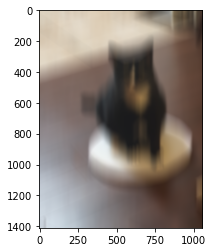

In [22]:
img_orig_blur = cv2.blur(img_orig, (13,131))
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

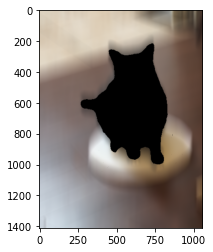

In [23]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

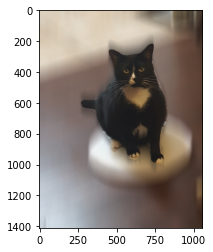

In [27]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

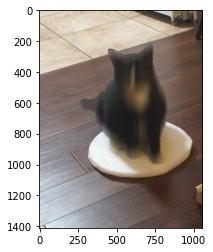

In [25]:
img_concat = np.where(img_mask_color == 255, img_orig_blur, img_orig)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

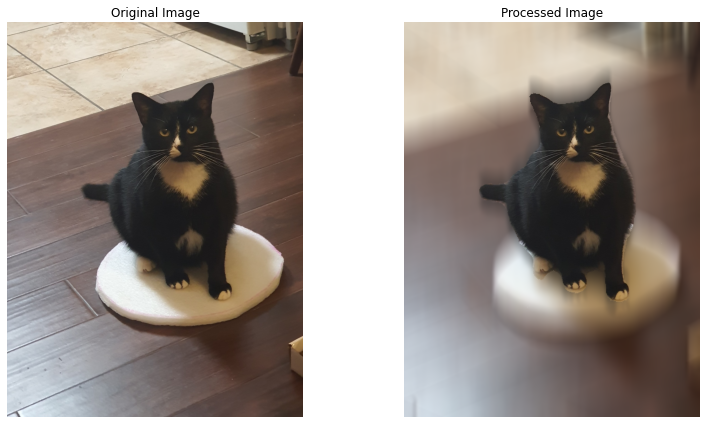

In [28]:
# 처리 전후 이미지 비교 시각화
plt.figure(figsize=(12, 6))

# 처리 전 (원본 이미지)
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# 처리 후 (결과 이미지)
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.title("Processed Image")
plt.axis('off')

# 이미지 보여주기
plt.tight_layout()
plt.show()

## Step 2. 사진에서 문제점 찾기

- 마스크 생성의 오류
- 화질 저하

## Step 3. 해결 방법을 제안해 보기

Semantic segmentation에서 마스크 생성의 오류를 보완할 수 있는 몇 가지 솔루션은 다음과 같습니다. 이러한 방법들은 정확한 객체 분리 및 배경 제거를 돕고, 모델이 더 정밀하게 마스크를 생성할 수 있도록 도와줍니다.

1. 후처리 기술 (Post-processing techniques)
- 크로핑 및 마스크 후처리 (Cropping & Mask Post-processing)
세그멘테이션 결과에서 불필요한 작은 영역이 생길 수 있습니다. 이러한 문제를 해결하려면 마스크 크기를 조정하거나, 작은 노이즈 영역을 제거하는 방법을 사용할 수 있습니다.
빈 영역 삭제: 너무 작은 객체가 마스크에 포함되어 있을 경우 cv2.findContours나 scipy.ndimage.measurements를 사용하여 작은 영역을 제거할 수 있습니다.
- 슬라이딩 윈도우 (Sliding Window)
세그멘테이션 결과의 품질이 저하된 경우, 작은 부분에서 잘라서 여러 번 예측을 진행하고, 각 예측 결과를 결합하는 방법도 고려할 수 있습니다. 이 방법은 세그멘테이션 품질이 낮은 부분을 개선할 수 있습니다.


2. 네트워크 아키텍처 개선
- 더 높은 해상도의 입력 이미지 사용
높은 해상도의 이미지를 입력으로 사용하면 더 세밀한 예측을 할 수 있습니다. DeepLabV3와 같은 모델은 고해상도 이미지에서 더 좋은 성능을 보입니다.
다만, 해상도를 너무 높이면 처리 속도가 느려지므로 적절한 해상도를 선택하는 것이 중요합니다.
- 데이터 증강 (Data Augmentation)
회전, 크기 조정, 수평/수직 플립 등의 다양한 데이터 증강 방법을 사용하여 모델을 더 강력하게 만들 수 있습니다. 이 방법은 모델이 다양한 상황에 대한 예측을 잘 할 수 있도록 돕습니다.
예를 들어, 배경이 다양한 환경에서 학습된 모델은 여러 종류의 배경을 더 잘 처리할 수 있습니다.
- 전이 학습 (Transfer Learning)
이미 대규모 데이터셋에서 학습된 모델(예: COCO, PASCAL VOC)을 사용하는 것이 효과적일 수 있습니다. 전이 학습을 통해 다른 환경에서 훈련된 모델의 특징을 활용하여 세그멘테이션 품질을 향상시킬 수 있습니다.


3. 적절한 마스크 합성
세그멘테이션 모델은 종종 일부 객체의 경계가 부정확하거나 누락될 수 있습니다. 이를 개선하기 위해 조건부 랜덤 필드(CRF) 또는 이미지 합성 기법을 사용할 수 있습니다. CRF는 세그멘테이션의 경계를 부드럽게 만들고, 객체 경계를 정확히 예측하는 데 도움을 줍니다.


4. 모델의 성능 향상
- 모델 튜닝 (Hyperparameter Tuning)
학습률, 배치 크기, 옵티마이저 등의 하이퍼파라미터를 튜닝하여 모델 성능을 향상시킬 수 있습니다. 모델이 과적합되지 않도록 Dropout이나 Early stopping을 활용하는 것도 좋습니다.
- 다중 클래스 세그멘테이션 (Multi-Class Segmentation)
다중 객체를 세그멘테이션해야 할 경우, 세그멘테이션 모델이 여러 클래스를 잘 구분할 수 있도록 학습하는 것이 중요합니다. 각 객체에 대해 적절한 클래스 라벨을 할당하고, 모델의 예측 성능을 최적화합니다.


5. 딥러닝 모델을 위한 후처리 필터링
조건부 랜덤 필드(CRF): 딥러닝 기반 모델에서 예측된 마스크에 후처리로 CRF를 적용하면, 더 세밀한 경계를 생성하고, 객체 간의 경계를 명확히 할 수 있습니다.
딥러닝 후처리 네트워크: 기존 세그멘테이션 네트워크를 후처리 네트워크와 결합하여 더 정교한 예측을 할 수 있습니다.


6. 마스크의 스무딩 (Smoothing the Mask)
마스크 경계를 부드럽게 하고, 불필요한 잡음을 제거하는 필터링 기법을 사용할 수 있습니다. GaussianBlur, medianBlur 등을 이용하여 마스크를 스무딩하고 세그멘테이션 품질을 개선할 수 있습니다.